# Task 1
### Data Cleaning and Data Preprocessing

#### Importing necessary libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

In [51]:
df = pd.read_csv('/content/Life Expectancy Data.csv')

In [52]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [53]:
df.shape

(2938, 22)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

In [55]:
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


### Checking missing value count

In [57]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
Infant deaths,0
Alcohol,194
Percentage expenditure,0
Hepatitis B,553
Measles,0


In [58]:
# Missing values percentage calculation
df.isnull().sum()/df.shape[0]*100

,0
Country,0.000000
Year,0.000000
Status,0.000000
Life expectancy,0.340368
Adult Mortality,0.340368
Infant deaths,0.000000
Alcohol,6.603131
Percentage expenditure,0.000000
Hepatitis B,18.822328
Measles,0.000000


In [59]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

#### Inspecting garbage values in categorical columns

In [60]:
for i in df.select_dtypes(include=object).columns:
  print(df[i].value_counts())

Country
Afghanistan              16
Albania                  16
Algeria                  16
Angola                   16
Antigua and Barbuda      16
                         ..
Monaco                    1
Marshall Islands          1
Saint Kitts and Nevis     1
San Marino                1
Tuvalu                    1
Name: count, Length: 193, dtype: int64
Status
Developing    2426
Developed      512
Name: count, dtype: int64


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
Infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
Percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
Under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [62]:
df.describe(include=object)

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [64]:
num_col = df.select_dtypes(include="number").columns

### Histograms to visualize the distributions of numerical columns

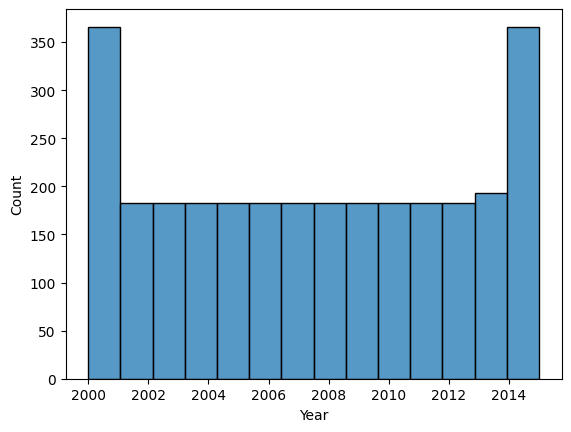

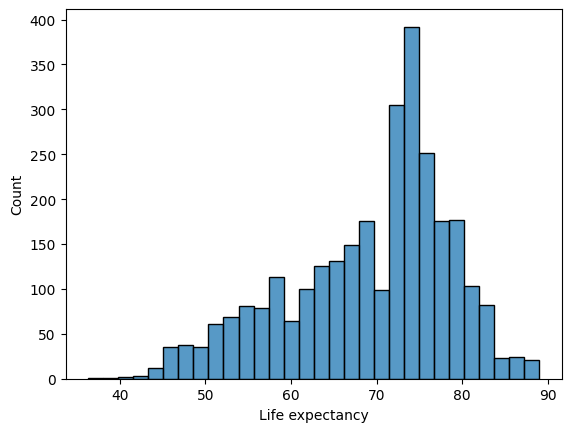

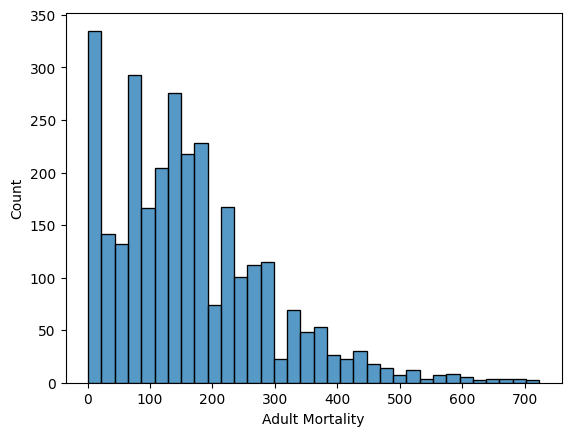

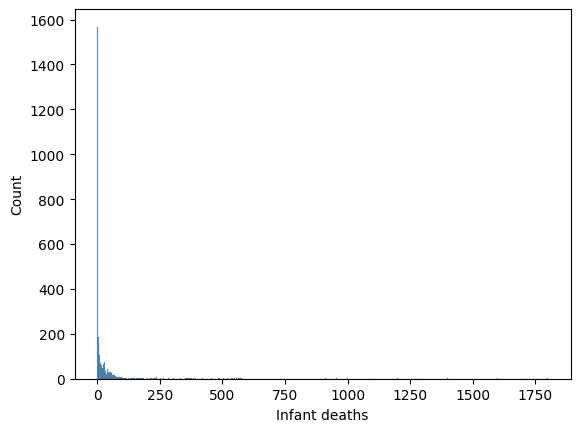

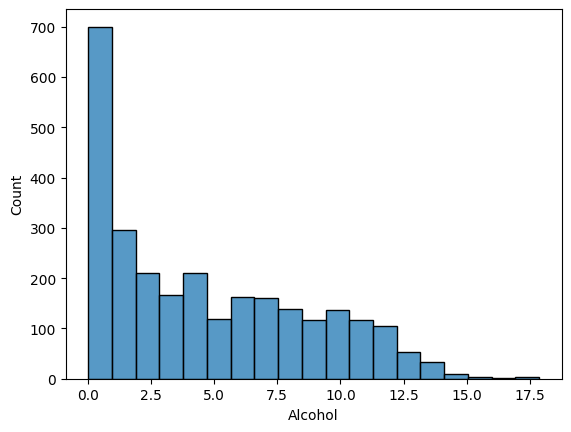

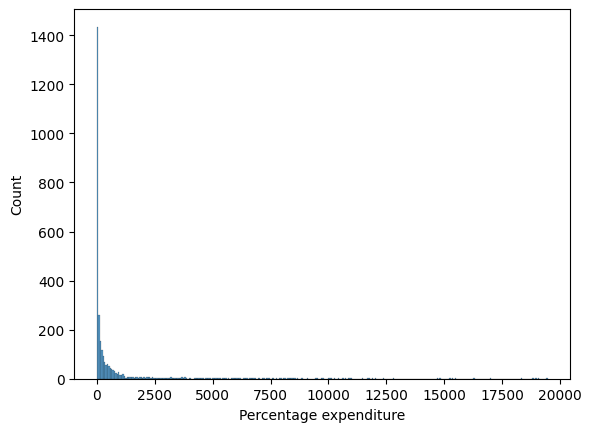

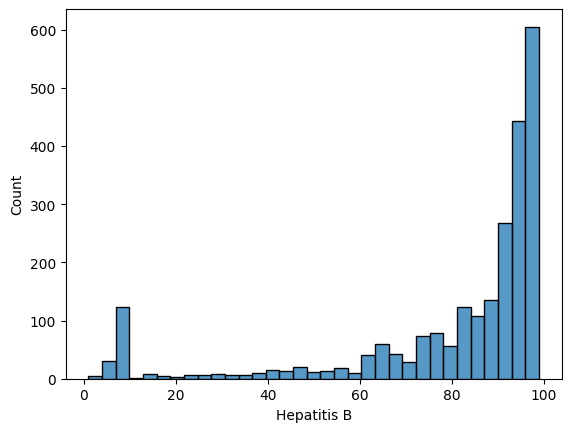

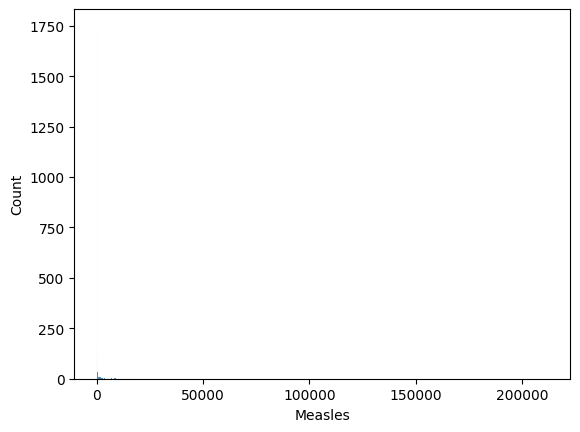

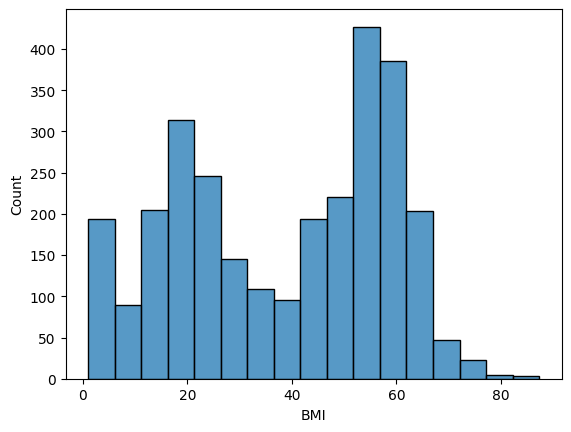

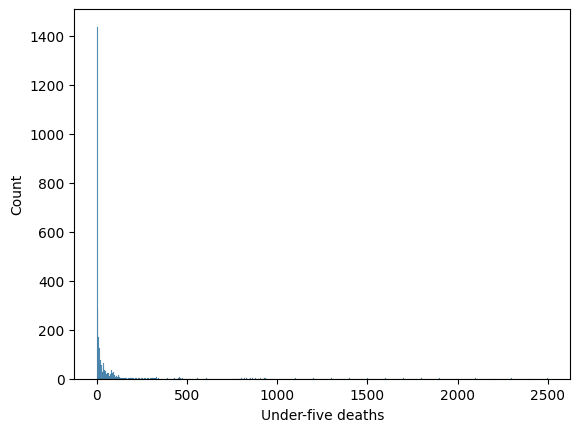

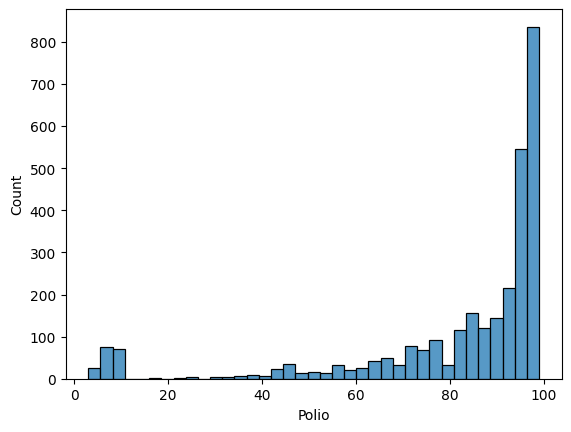

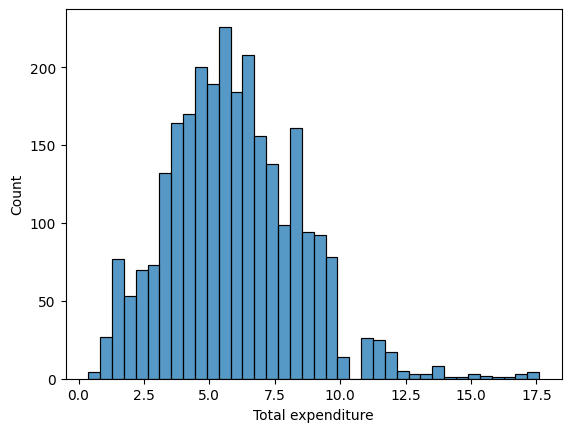

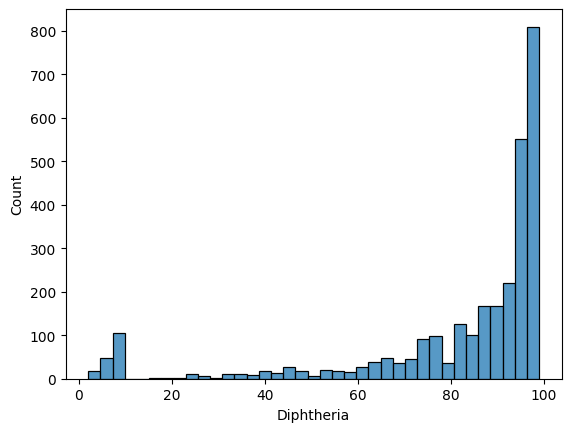

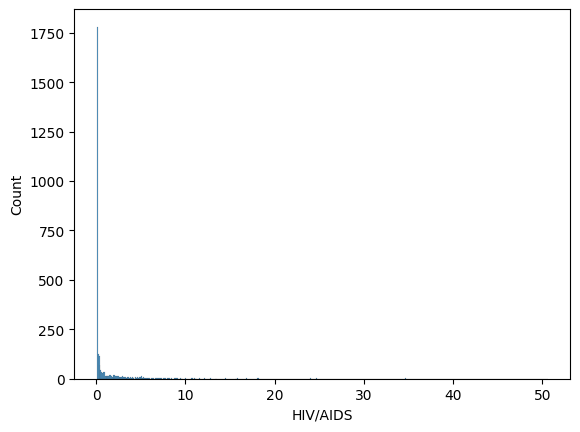

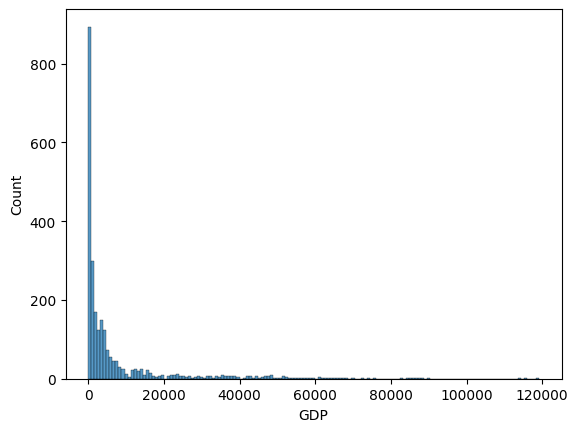

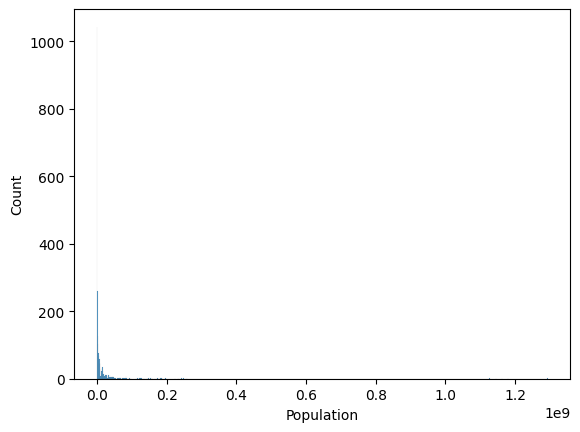

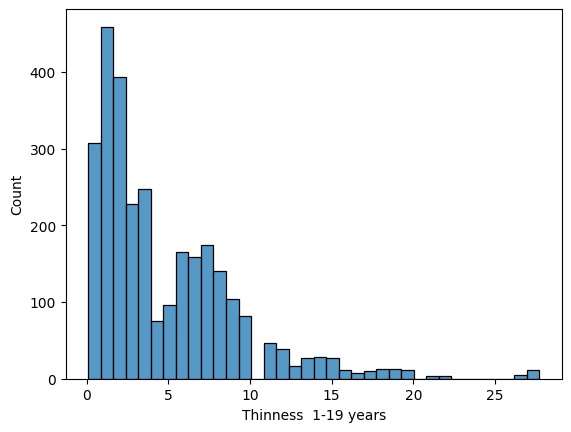

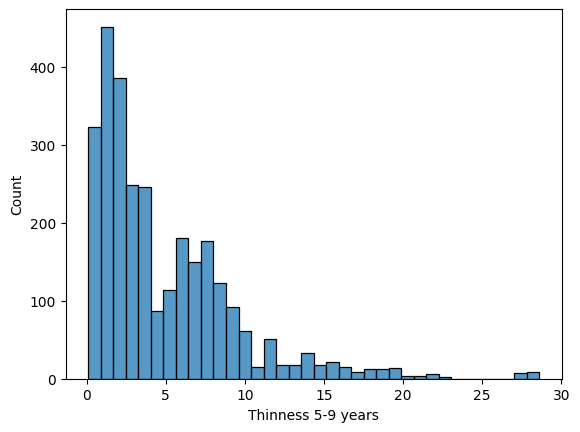

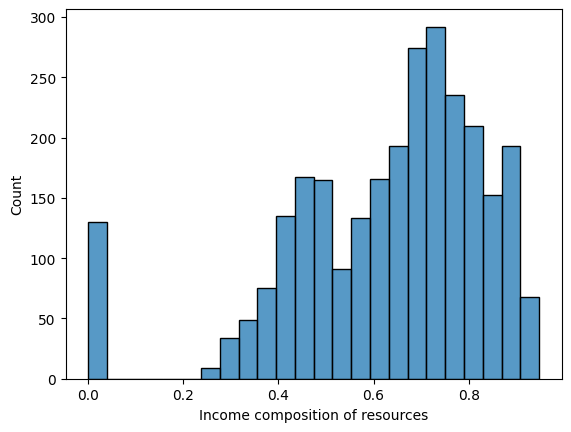

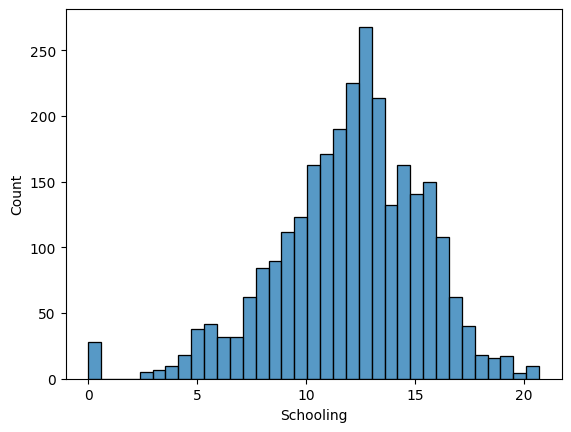

In [65]:
for i in num_col:
  sns.histplot(df[i])
  plt.show()

### Boxplots to visualize the outliers in the data

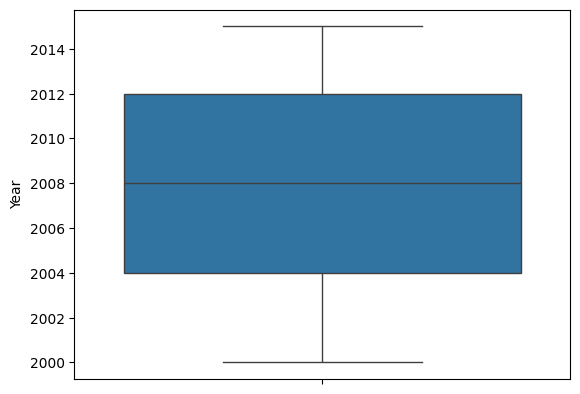

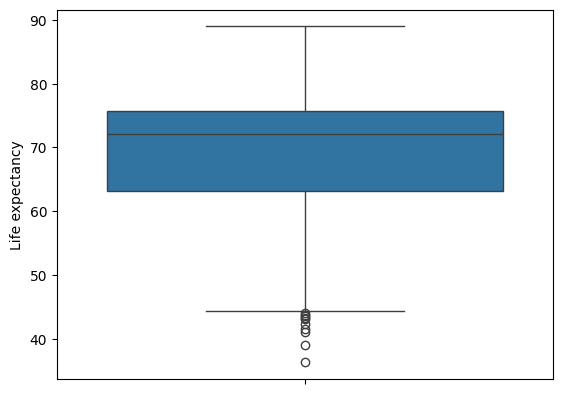

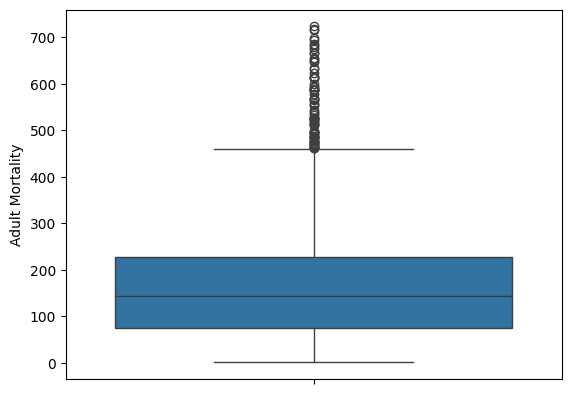

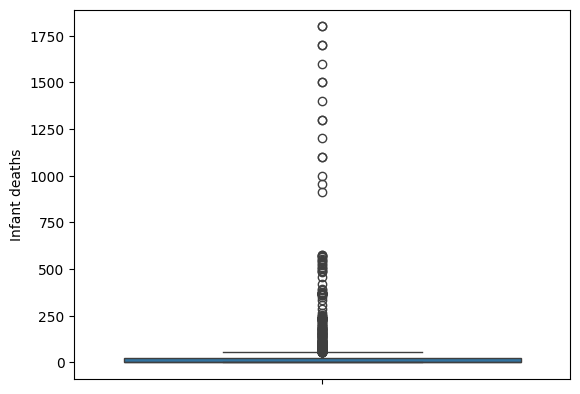

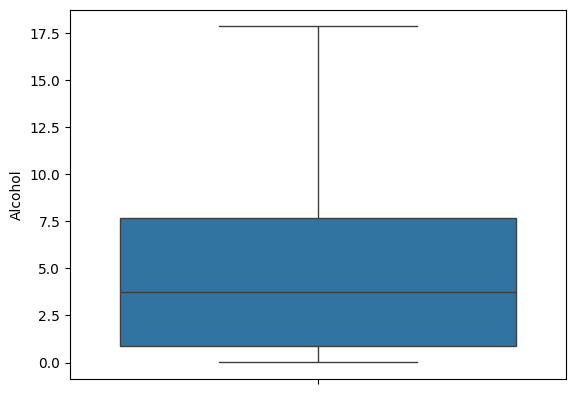

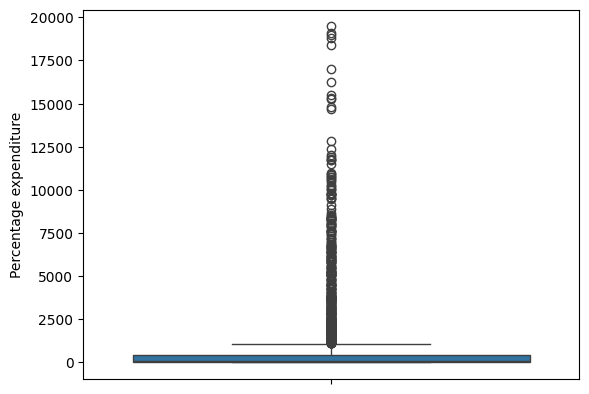

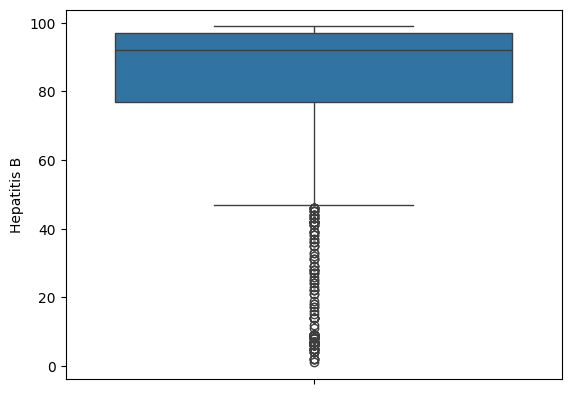

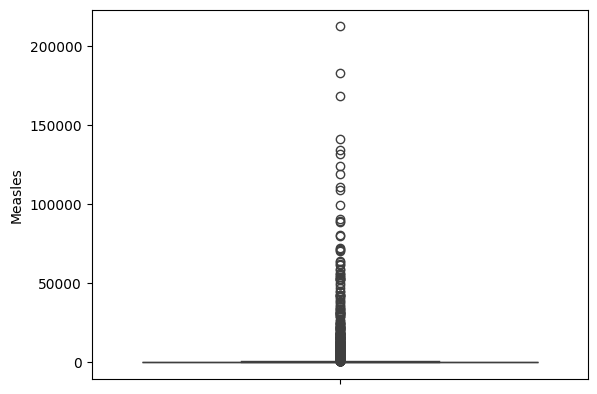

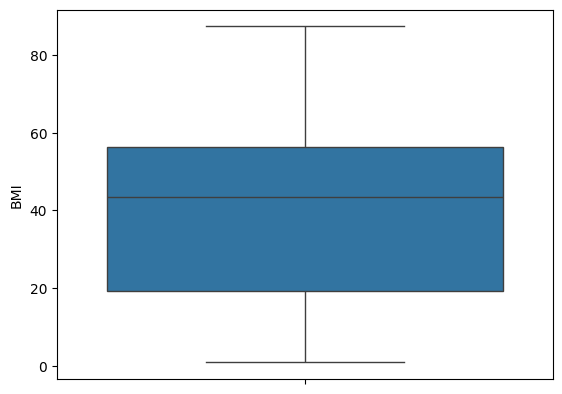

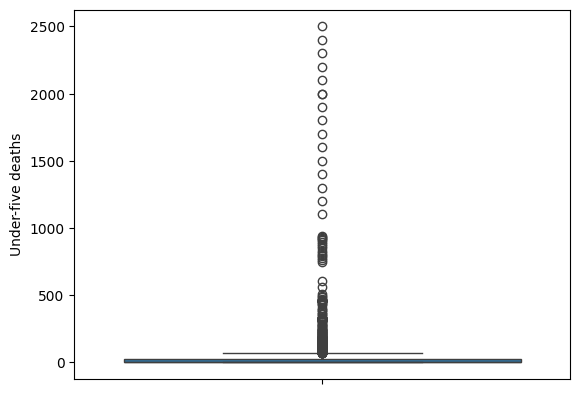

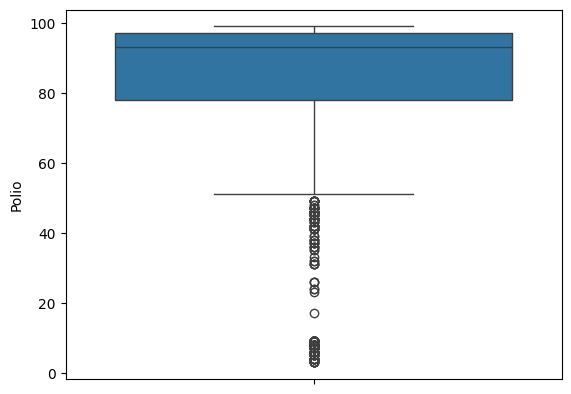

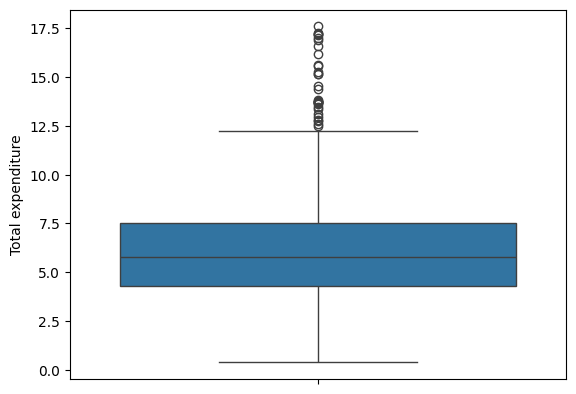

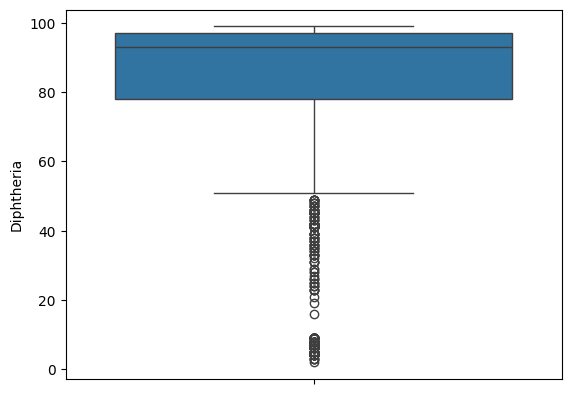

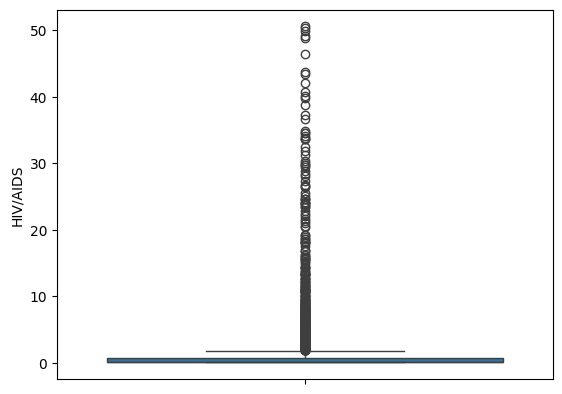

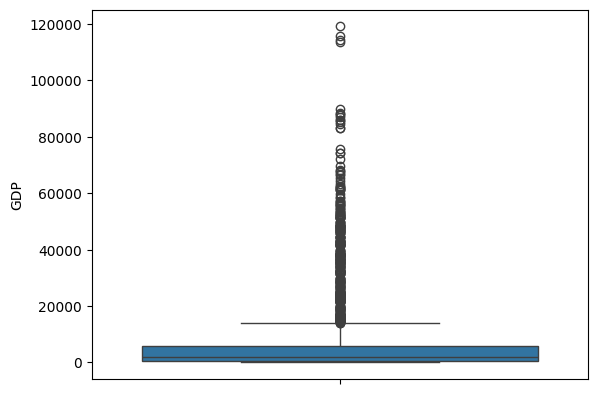

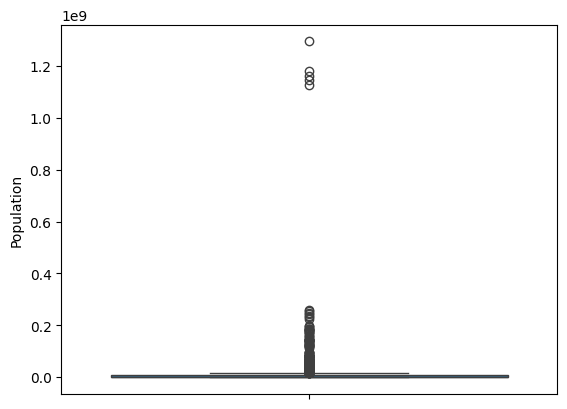

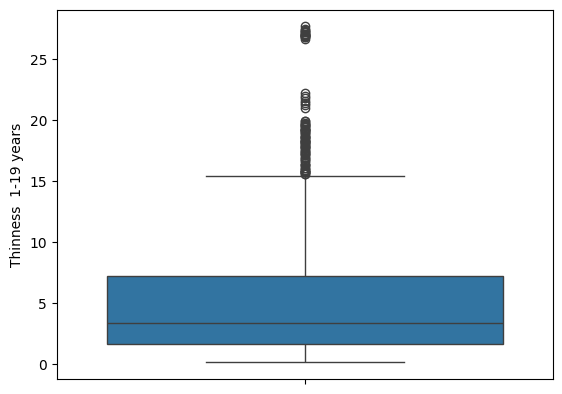

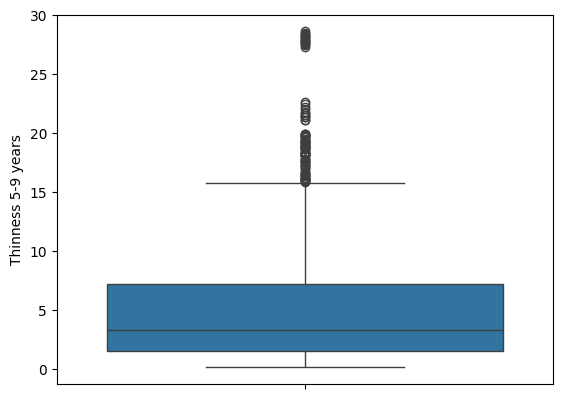

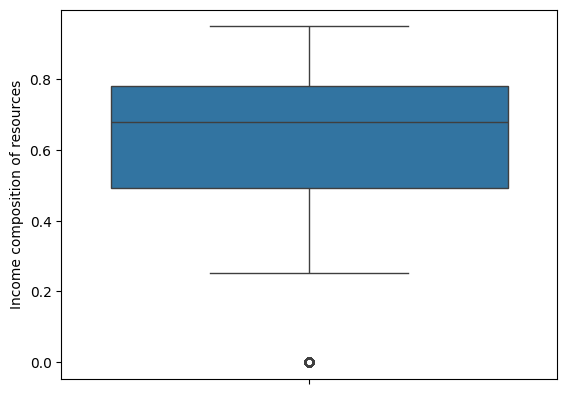

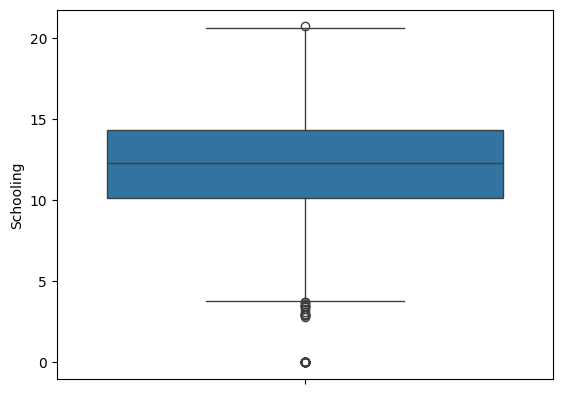

In [66]:
for i in num_col:
  sns.boxplot(df[i])
  plt.show()

### Scatter plots to visualize relationship of numerical columns with the target 'Life Expectancy'

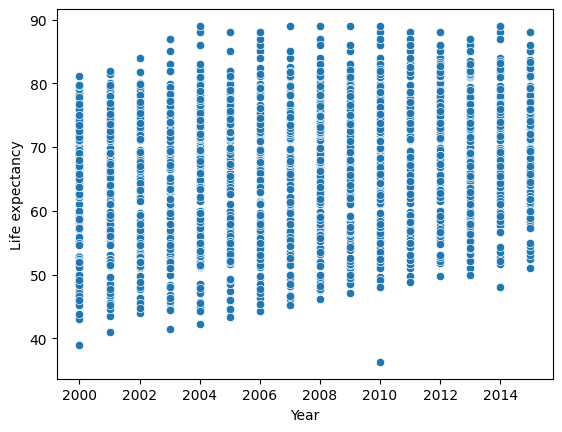

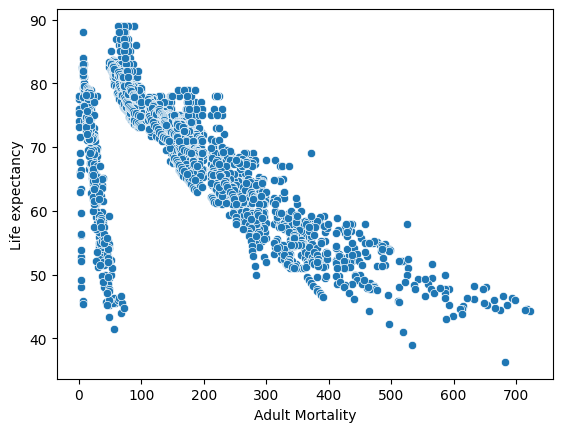

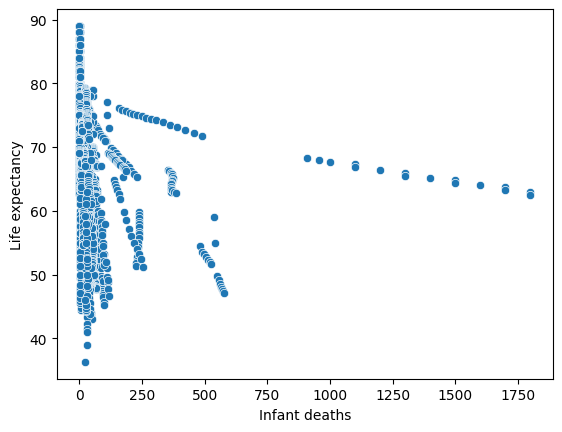

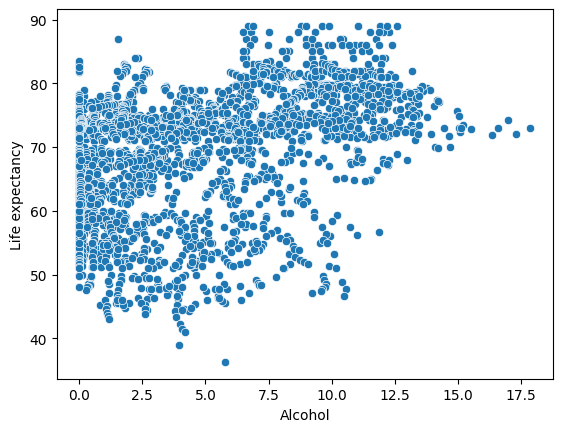

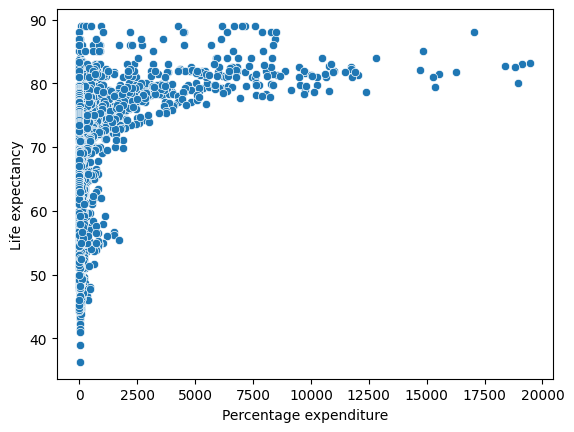

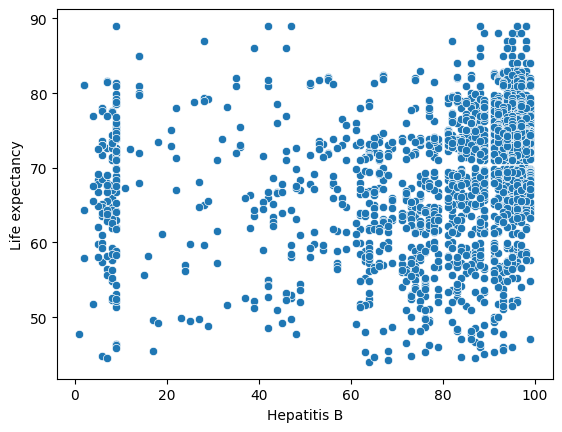

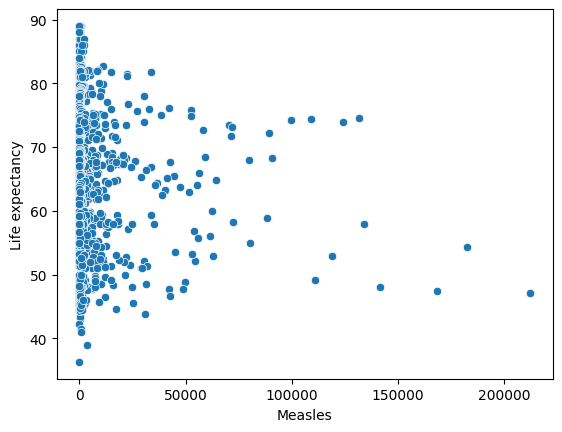

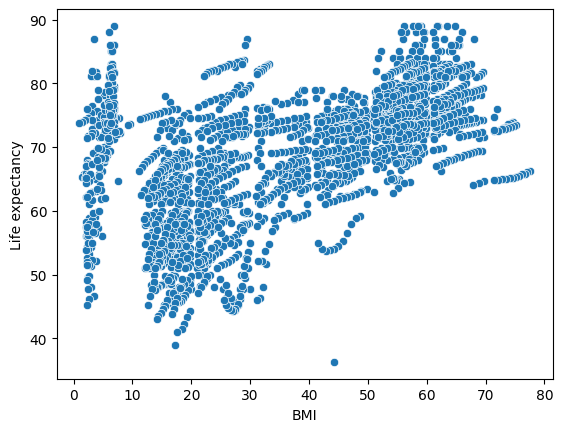

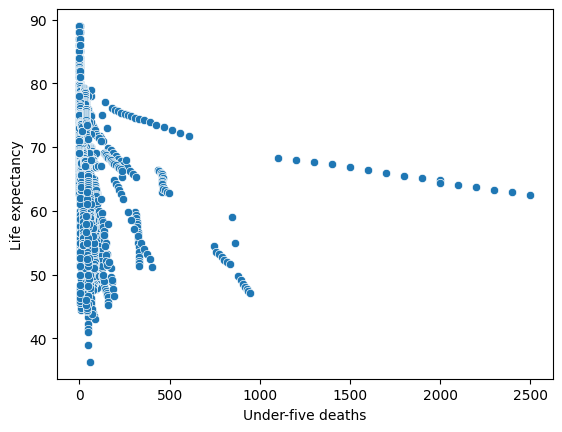

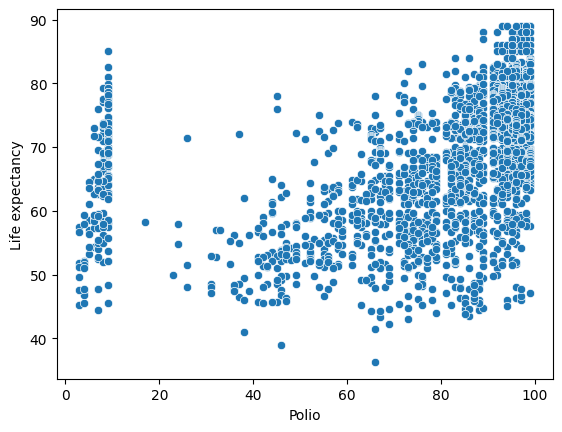

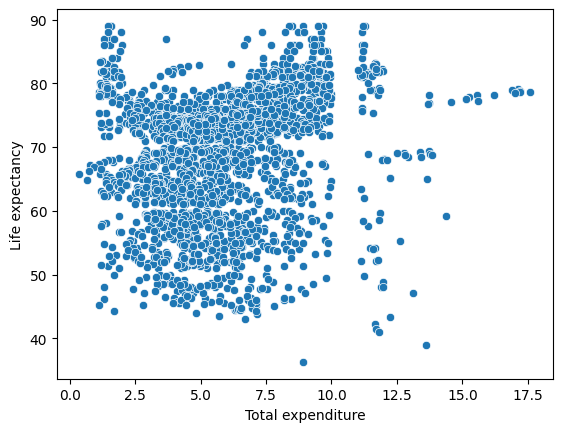

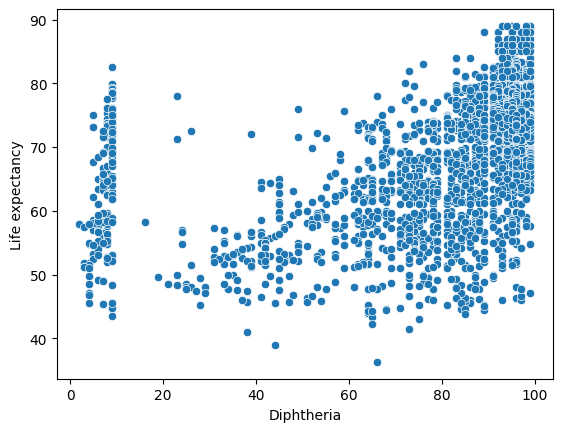

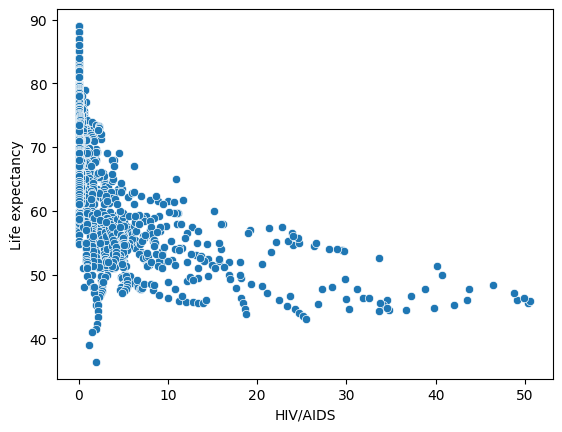

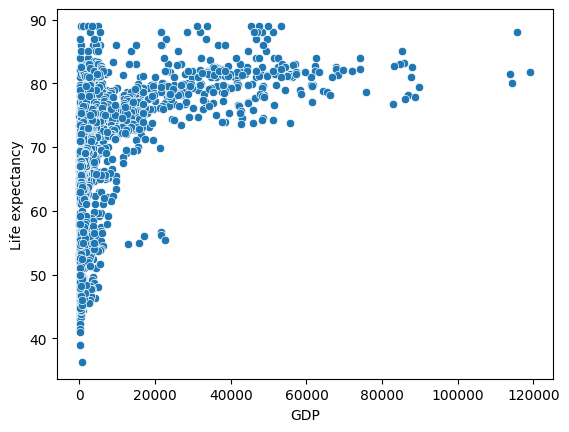

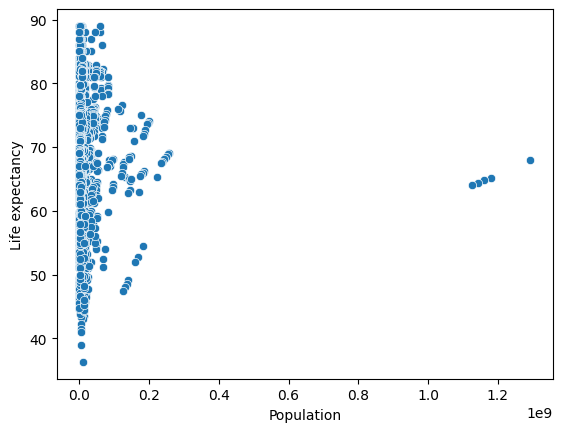

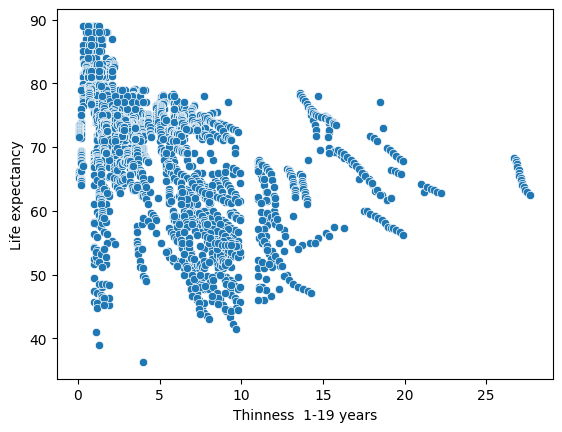

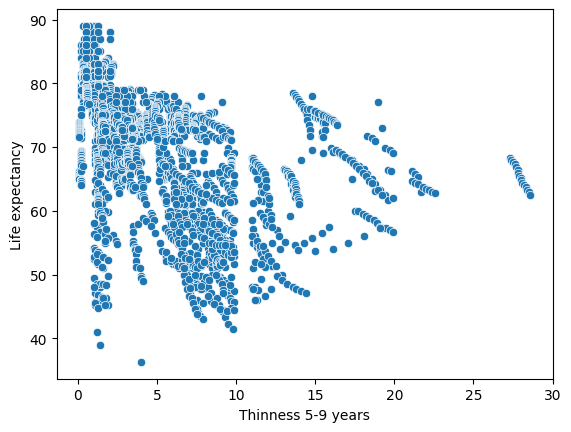

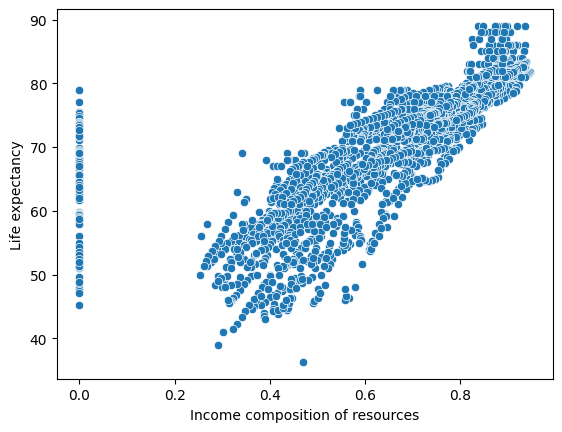

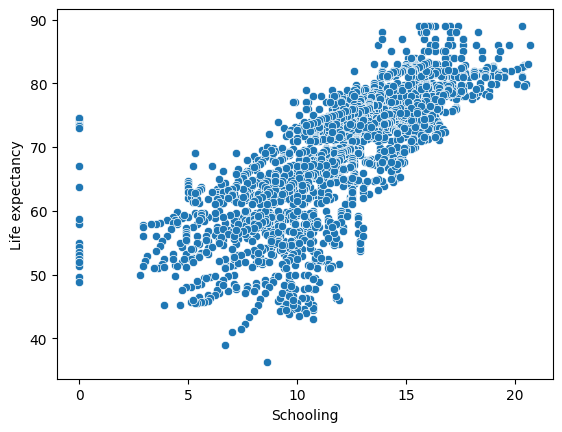

In [68]:
for i in ['Year', 'Adult Mortality', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']:
       sns.scatterplot(x=df[i], y=df['Life expectancy'])
       plt.show()

In [69]:
df.select_dtypes(include="number").corr()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
Infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
Percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
Under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


### Correlation Heatmap

<Axes: >

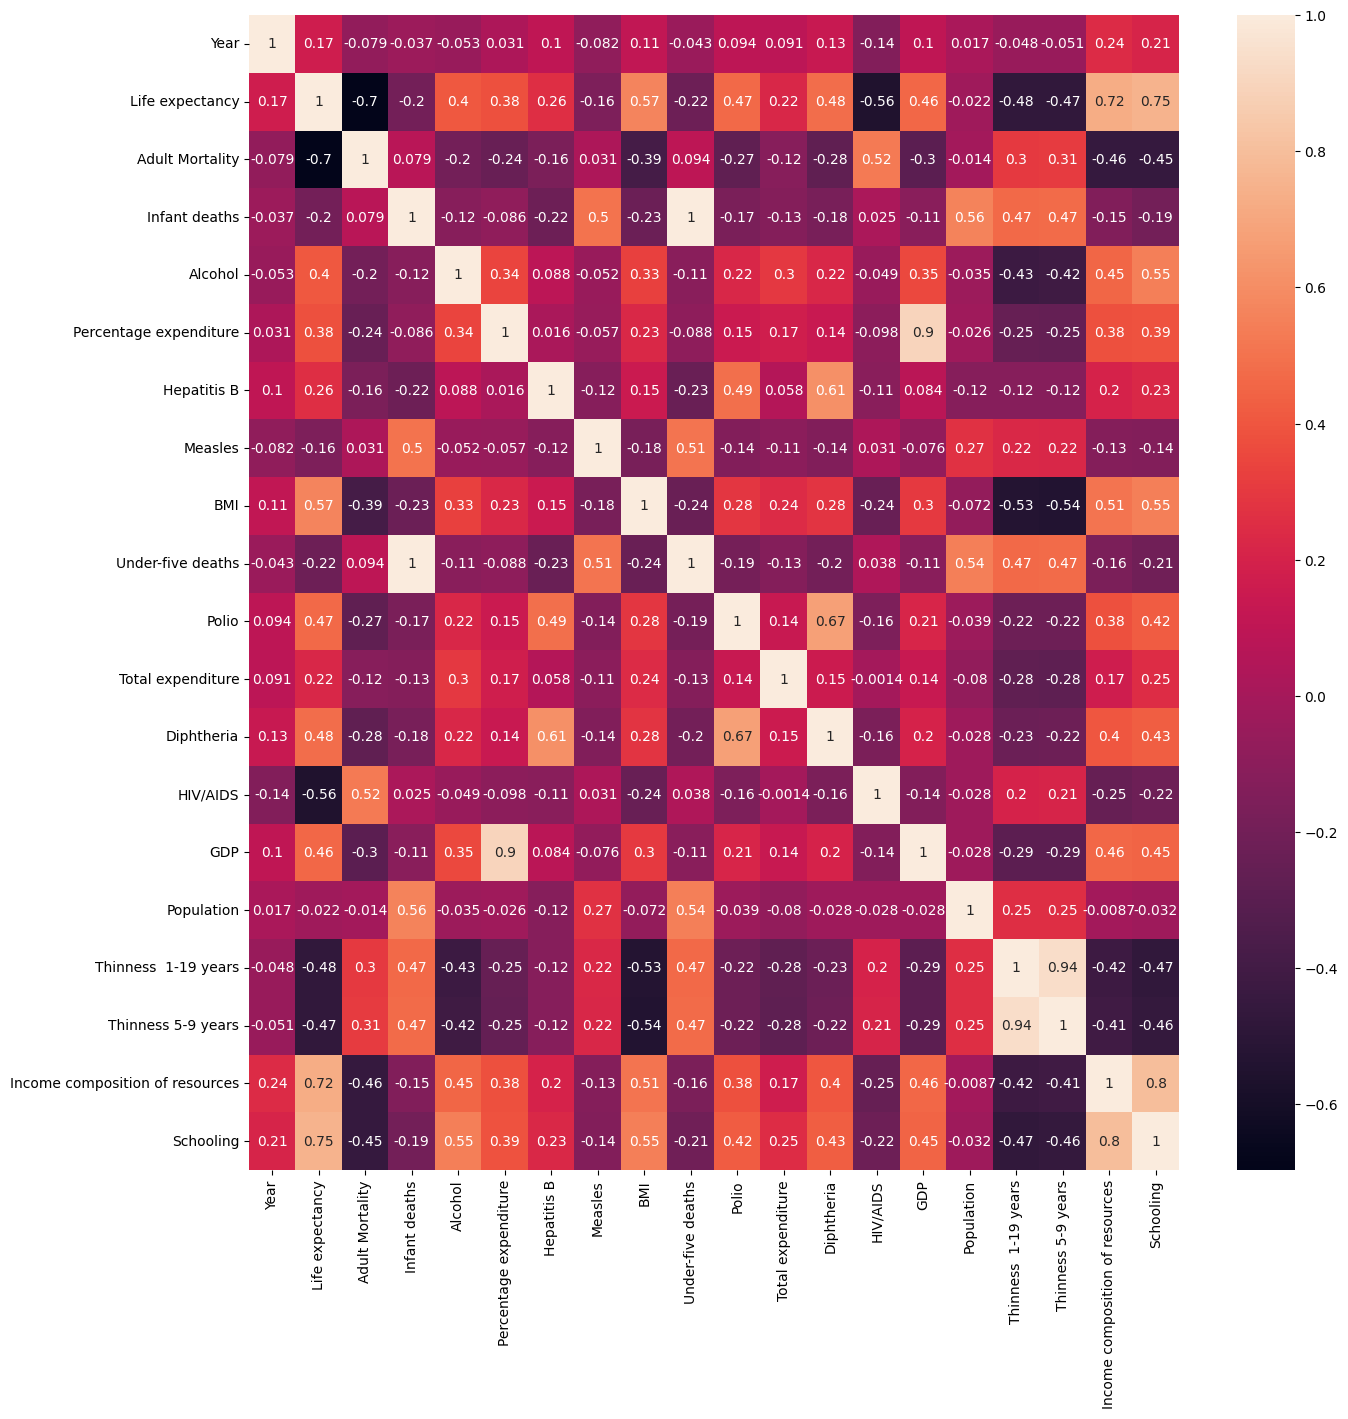

In [70]:
plt.figure(figsize=(15,15))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True)

### Missing value treatment with K-Nearest Neighbours

In [71]:
# Initialize KNNImputer
impute = KNNImputer(n_neighbors=5)

for i in num_col:
  df[i] = impute.fit_transform(df[[i]])

In [72]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
Infant deaths,0
Alcohol,0
Percentage expenditure,0
Hepatitis B,0
Measles,0


### Treating outliers

In [73]:
def outlier_treatment(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound,
                       np.where(df[col] < lower_bound, lower_bound, df[col]))
    return df

for col in num_col:
    df = outlier_treatment(df, col)

### Visualizing boxplots after Outlier treatment

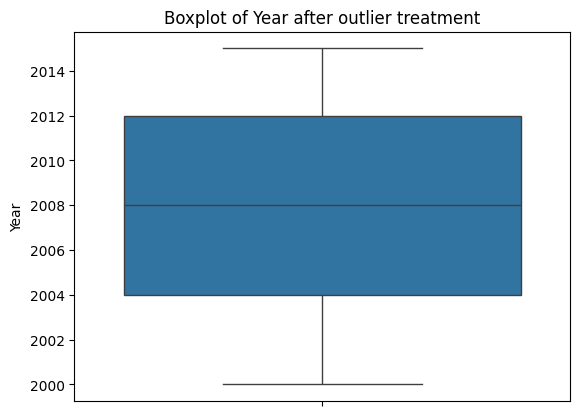

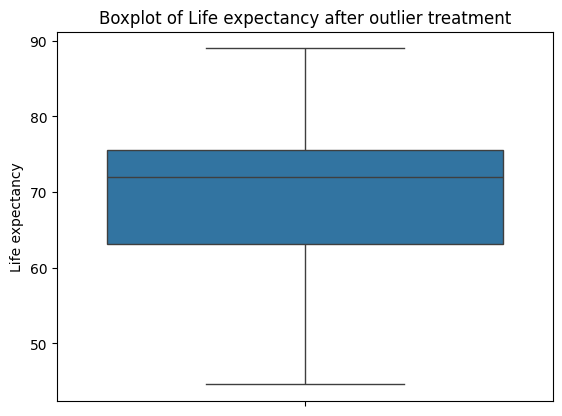

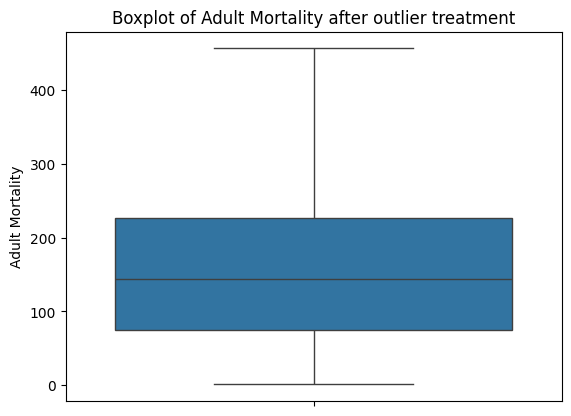

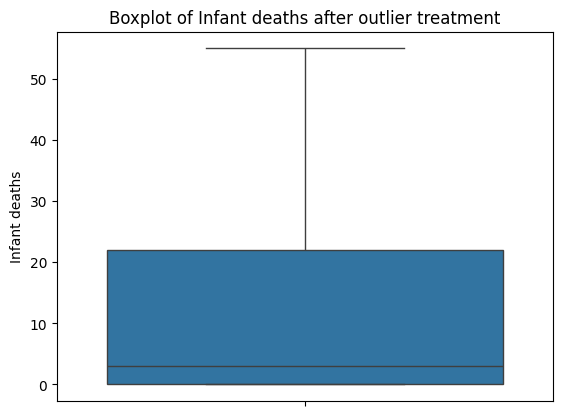

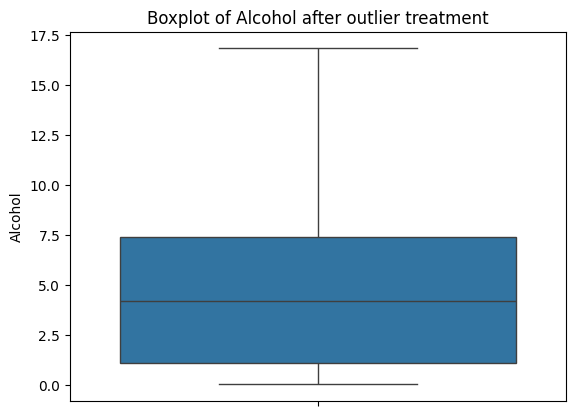

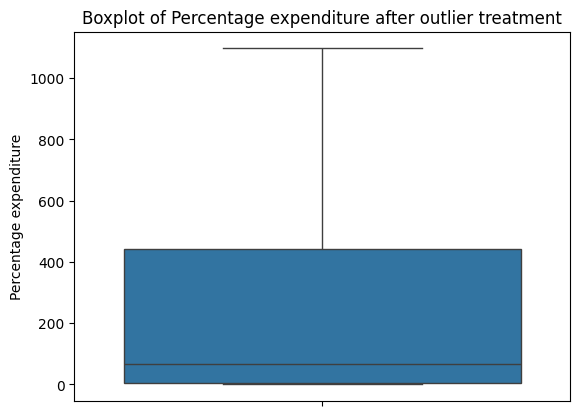

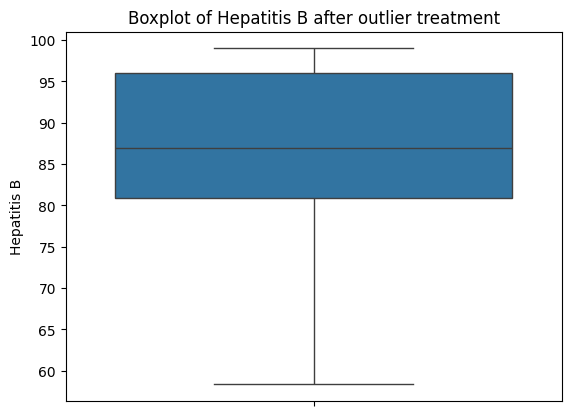

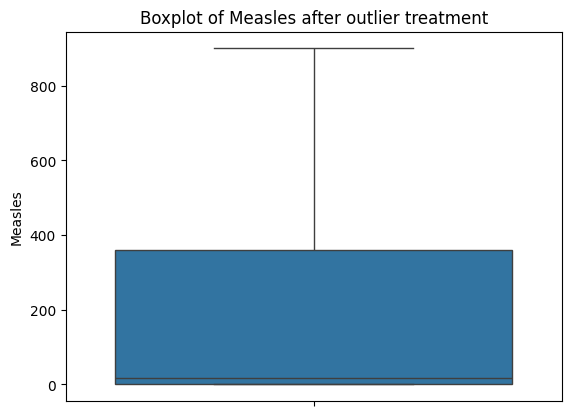

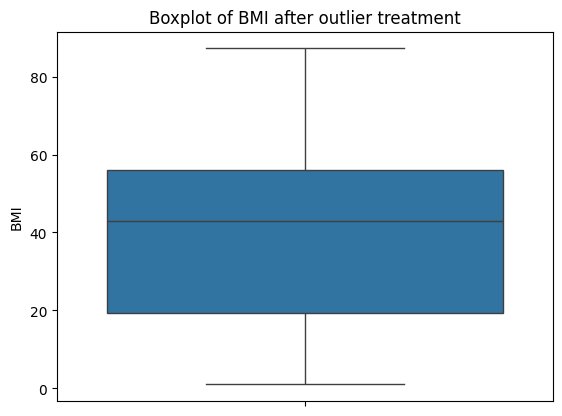

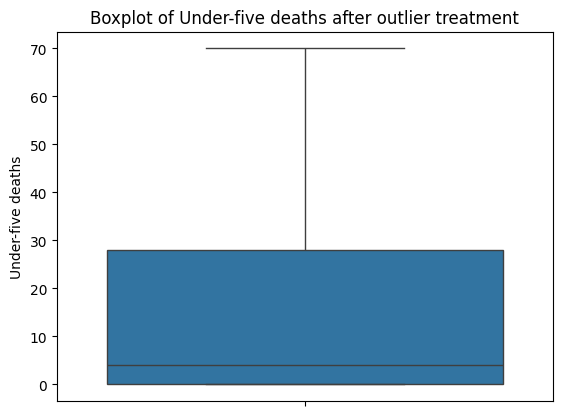

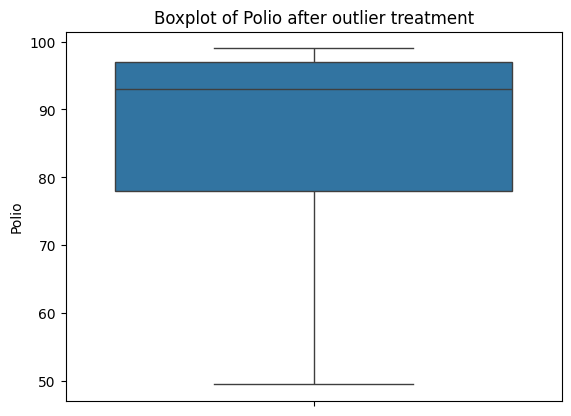

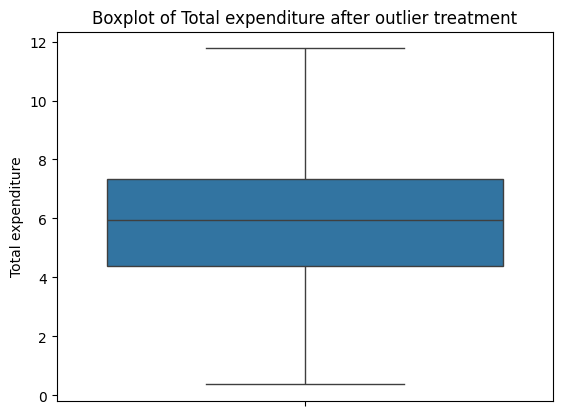

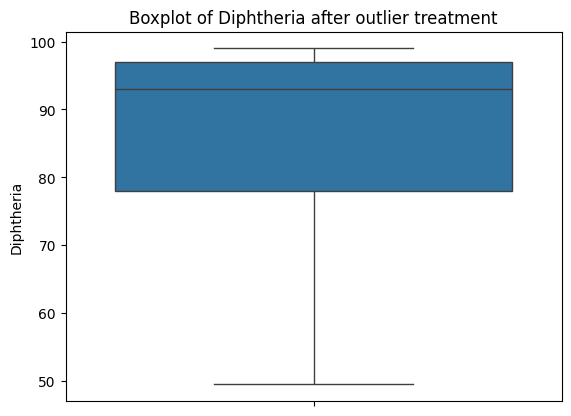

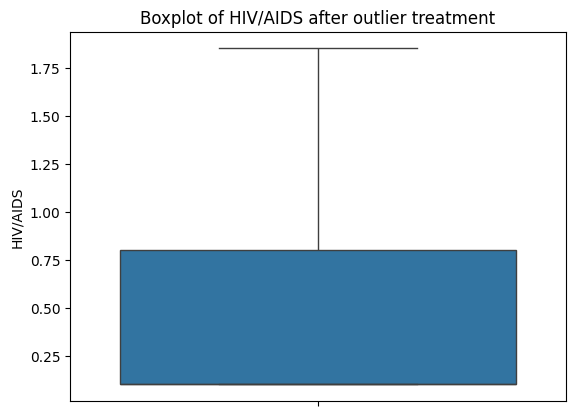

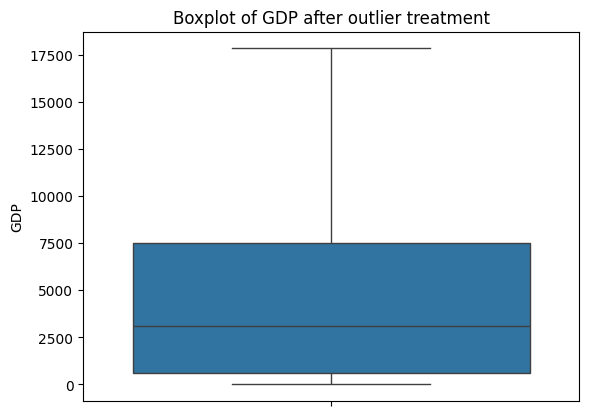

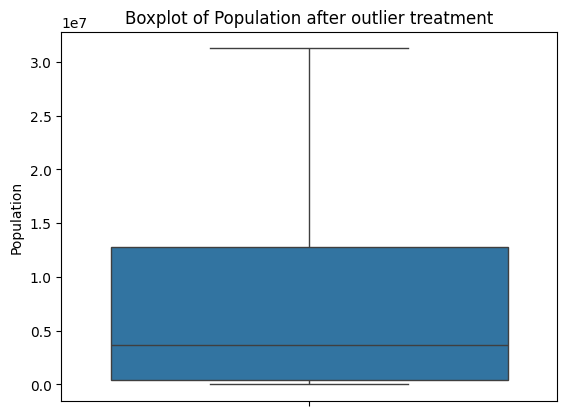

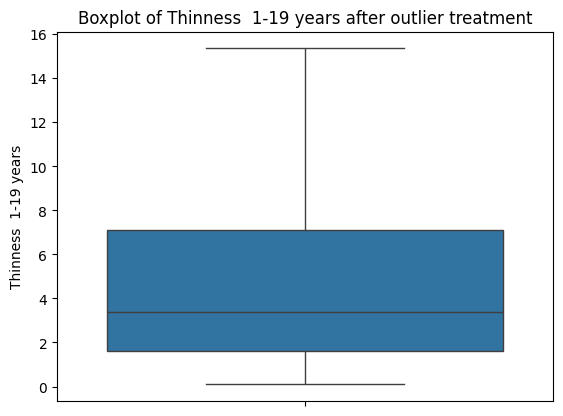

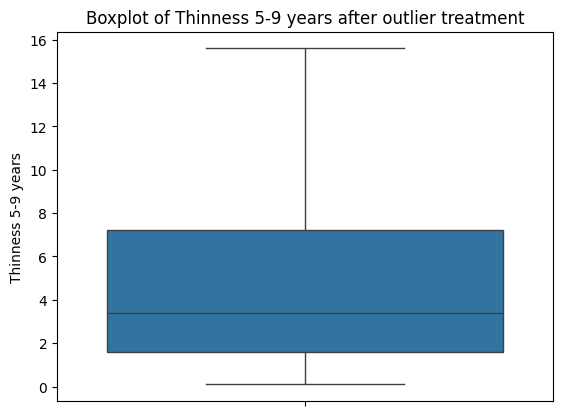

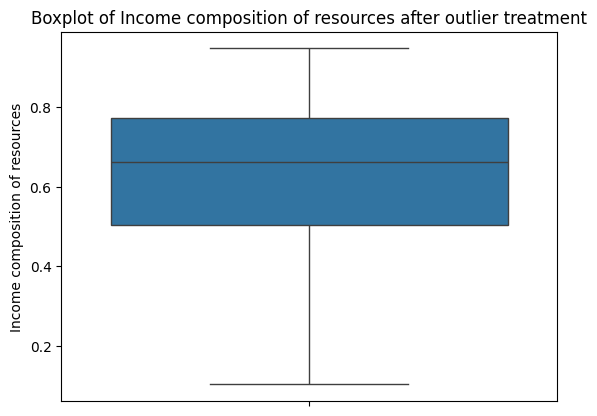

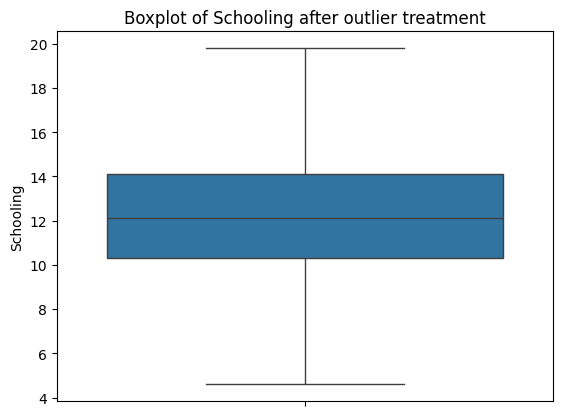

In [74]:
for i in num_col:
  sns.boxplot(df[i])
  plt.title(f'Boxplot of {i} after outlier treatment') # Added title for clarity
  plt.show()

###Label Encoding for categorical columns

In [75]:
# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to categorical columns
for col in ['Status', 'Country']:
    df[col] = le.fit_transform(df[col])

In [76]:
df.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
723,46,2013.0,1,58.8,272.0,55.0,0.01,0.000000,74.0,900.625,...,74.0,3.89,74.0,1.2,7483.158469,1.275338e+07,9.9,9.6,0.627551,11.992793
2696,176,2000.0,1,74.0,143.0,44.0,1.54,421.295660,71.0,900.625,...,85.0,4.95,85.0,0.1,4316.553895,6.324121e+06,5.3,5.2,0.641000,10.700000
2685,176,2011.0,1,74.5,114.0,20.0,1.53,1096.807347,96.0,111.000,...,97.0,5.29,97.0,0.1,11341.133950,7.349455e+06,4.9,4.7,0.737000,13.800000
185,11,2006.0,1,75.5,79.0,0.0,2.10,170.737403,98.0,3.000,...,98.0,3.80,98.0,0.1,1937.995490,1.275338e+07,6.1,5.9,0.810000,14.200000
2704,177,2008.0,1,64.5,235.0,6.0,2.40,34.239794,96.0,0.000,...,96.0,1.93,96.0,0.1,394.467675,4.935762e+06,3.2,3.3,0.102625,10.500000
